In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

from detectron2.config import get_cfg           # Para importar la configuración de la red
from detectron2.engine import DefaultPredictor  # Para importar el predictor
from detectron2.data import MetadataCatalog     # Para importar los datos
from detectron2 import model_zoo                # Para importar el modelo
import matplotlib.pyplot as plt

In [2]:
# Install the opencv-python package
# %pip install opencv-python

from detectron2.utils.visualizer import ColorMode, Visualizer  # Para visualizar las imágenes

In [3]:
import cv2          # Para leer y mostrar imágenes
import numpy as np

Nota (diferencias modelo y predictor): El modelo se refiere a la arquitectura de la red neuronal y sus parámetros (pesos) que se utilizan para realizar tareas específicas, como la detección de objetos.  El predictor utiliza la configuración del modelo para realizar predicciones en nuevas imágenes. 

Para ver los códigos de los distintos modelos entrenados dentro de Model Zoo nos metemos en el archivo https://github.com/facebookresearch/detectron2/blob/main/MODEL_ZOO.md

In [4]:
class Detector:
    def __init__(self):        # Para definir el constructor de la clase
        self.cfg = get_cfg()   # Para obtener la configuración del modelo

        # Cargamos la configuración del modelo y preentrenar el modelo
        self.cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))     # Para cargar la configuración del modelo
        self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")   # Para cargar los pesos del modelo
        self.cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7                                                       # Para definir el umbral de confianza
        self.cfg.MODEL.DEVICE = "cpu"                    # Para definir el dispositivo
        self.predictor = DefaultPredictor(self.cfg)      # Para definir el predictor
        
        # Definir la ruta base para las imágenes
        self.base_image_path = "C:/Users/Marina/Practicas/Detectron2_pruebas/imagenes_probando_modelos/"

    # Para imágenes
    def detect_image(self, image_name):  # Metemos el nombre de la imagen
        image_path = self.base_image_path + image_name  # Concatenar la ruta base con el nombre de la imagen
        image = cv2.imread(image_path)  # Para leer la imagen
        predictions = self.predictor(image) # Para obtener las predicciones

        viz = Visualizer(image[:, :, ::-1], MetadataCatalog.get(self.cfg.DATASETS.TRAIN[0]), scale=1.2)  # Para visualizar las imágenes
        instances_mode = ColorMode.IMAGE_BW  # Para definir el modo de color
        
        out = viz.draw_instance_predictions(predictions["instances"].to("cpu"))  # Para dibujar las predicciones en la imagen de entrada
        cv2.imshow("Resultados", out.get_image()[:, :, ::-1]) # Para mostrar la imagen
        cv2.waitKey(0)  # Para esperar a que se presione una tecla

In [5]:
detector = Detector()  # Para crear un objeto de la clase Detector

In [6]:
detector.detect_image("futbol.jpg")

c:\Users\Marina\.conda\envs\detectron2\Lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [7]:
class Detector:
    def __init__(self,model_type):   # Para definir el constructor de la clase
        self.cfg = get_cfg()              # Para obtener la configuración del modelo

        # Cargamos la configuración del modelo y preentrenar el modelo

        if model_type == "OD":     # "Object Detection"
            self.cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
            self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")   # Para cargar los pesos del modelo
        elif model_type == "IS":  # "Instance Segmentation"
            self.cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
            self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
        self.cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7                                                       # Para definir el umbral de confianza
        self.cfg.MODEL.DEVICE = "cpu"                    # Para definir el dispositivo
        self.predictor = DefaultPredictor(self.cfg)      # Para definir el predictor
 
        # Definir la ruta base para las imágenes
        self.base_image_path = "C:/Users/Marina/Practicas/Detectron2_pruebas/imagenes_probando_modelos/"

    # Para imágenes
    def detect_image(self, image_name):  # Metemos el nombre de la imagen
        image_path = self.base_image_path + image_name  # Concatenar la ruta base con el nombre de la imagen
        image = cv2.imread(image_path)  # Para leer la imagen
        predictions = self.predictor(image) # Para obtener las predicciones

        viz = Visualizer(image[:, :, ::-1], MetadataCatalog.get(self.cfg.DATASETS.TRAIN[0]), scale=1.2)  # Para visualizar las imágenes
        instances_mode = ColorMode.IMAGE_BW # Para definir el modo de color
        
        out = viz.draw_instance_predictions(predictions["instances"].to("cpu"))  # Para dibujar las predicciones en la imagen de entrada
        cv2.imshow("Resultados", out.get_image()[:, :, ::-1]) # Para mostrar la imagen
        cv2.waitKey(0)  # Para esperar a que se presione una tecla

In [8]:
detector2 = Detector(model_type="IS")  # Para crear un objeto de la clase Detector con model_type

In [9]:
detector2.detect_image("futbol.jpg")

Nota: La detección de puntos clave (Keypoint Detection) es una técnica utilizada para identificar y localizar puntos de interés específicos en una imagen

In [10]:
class KeypointDetector:
    def __init__(self):
        self.cfg = get_cfg()  # Obtener la configuración del modelo

        # Cargar la configuración del modelo y los pesos preentrenados para la detección de puntos clave
        self.cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
        self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
        self.cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # Umbral de confianza
        self.cfg.MODEL.DEVICE = "cpu"  # Dispositivo de cómputo (CPU o GPU)

        self.predictor = DefaultPredictor(self.cfg)  # Definir el predictor

        # Definir la ruta base para las imágenes
        self.base_image_path = "C:/Users/Marina/Practicas/Detectron2_pruebas/imagenes_probando_modelos/"

    # Para imágenes
    def detect_image(self, image_name):  # Metemos el nombre de la imagen
        image_path = self.base_image_path + image_name  # Concatenar la ruta base con el nombre de la imagen
        image = cv2.imread(image_path)
        predictions = self.predictor(image)  # Obtener las predicciones

        # Verificar si self.cfg.DATASETS.TRAIN no está vacío
        if len(self.cfg.DATASETS.TRAIN) > 0:
            dataset_name = self.cfg.DATASETS.TRAIN[0]
        else:
            dataset_name = "coco_2017_train"  # Usar un nombre de dataset por defecto

        # Visualizar las predicciones
        viz = Visualizer(image[:, :, ::-1], MetadataCatalog.get(dataset_name), scale=1.2)
        viz = viz.draw_instance_predictions(predictions["instances"].to("cpu"))
        out_image = viz.get_image()[:, :, ::-1]

        # Mostrar la imagen con los puntos clave detectados
        cv2.imshow("Keypoints Detection", out_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()


In [11]:
keypoint_detector = KeypointDetector()

In [12]:
keypoint_detector.detect_image("futbol.jpg")

Nota: El modelo LVIS (Large Vocabulary Instance Segmentation) es una extensión de los modelos de segmentación de instancias que se enfoca en la segmentación de objetos con un vocabulario grande y diverso. 

Nota: en el siguiente código mostramos las imágenes aquí (no nos la abre aparte)

In [13]:

class Detector:
    def __init__(self, model_type="OD"):  # Para definir el constructor de la clase
        self.cfg = get_cfg()  # Para obtener la configuración del modelo

        # Cargamos la configuración del modelo y preentrenar el modelo
        if model_type == "OD":  # Si el tipo de modelo es "OD" (Object Detection)
            self.cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
            self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")  # Para cargar los pesos del modelo
        elif model_type == "IS":  # Si el tipo de modelo es "IS" (Instance Segmentation)
            self.cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
            self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
        elif model_type == "LVIS":  # Si el tipo de modelo es "LVIS Segmentation"
            self.cfg.merge_from_file(model_zoo.get_config_file("LVISv0.5-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml"))
            self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("LVISv0.5-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml")

        self.cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # Para definir el umbral de confianza
        self.cfg.MODEL.DEVICE = "cpu"  # Para definir el dispositivo
        self.predictor = DefaultPredictor(self.cfg)  # Para definir el predictor
            
        # Definir la ruta base para las imágenes
        self.base_image_path = "C:/Users/Marina/Practicas/Detectron2_pruebas/imagenes_probando_modelos/"

    # Para imágenes
    def detect_image(self, image_name):  # Metemos el nombre de la imagen
        image_path = self.base_image_path + image_name  # Concatenar la ruta base con el nombre de la imagen
        image = cv2.imread(image_path)
        predictions = self.predictor(image)  # Obtener las predicciones
        # Verificar si self.cfg.DATASETS.TRAIN no está vacío
        
        if len(self.cfg.DATASETS.TRAIN) > 0:
            dataset_name = self.cfg.DATASETS.TRAIN[0]
        else:
            dataset_name = "coco_2017_train"  # Usar un nombre de dataset por defecto

        # Visualizar las predicciones de segmentación de instancias
        viz = Visualizer(image[:, :, ::-1], MetadataCatalog.get(dataset_name), scale=1.2)
        out_image = viz.draw_instance_predictions(predictions["instances"].to("cpu")).get_image()[:, :, ::-1]

        # Convertir la imagen de BGR a RGB
        out_image_rgb = cv2.cvtColor(out_image, cv2.COLOR_BGR2RGB)

        # Mostrar la imagen con las instancias detectadas utilizando matplotlib
        plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura
        plt.imshow(out_image_rgb)
        plt.axis('off')  # Ocultar los ejes
        plt.show()

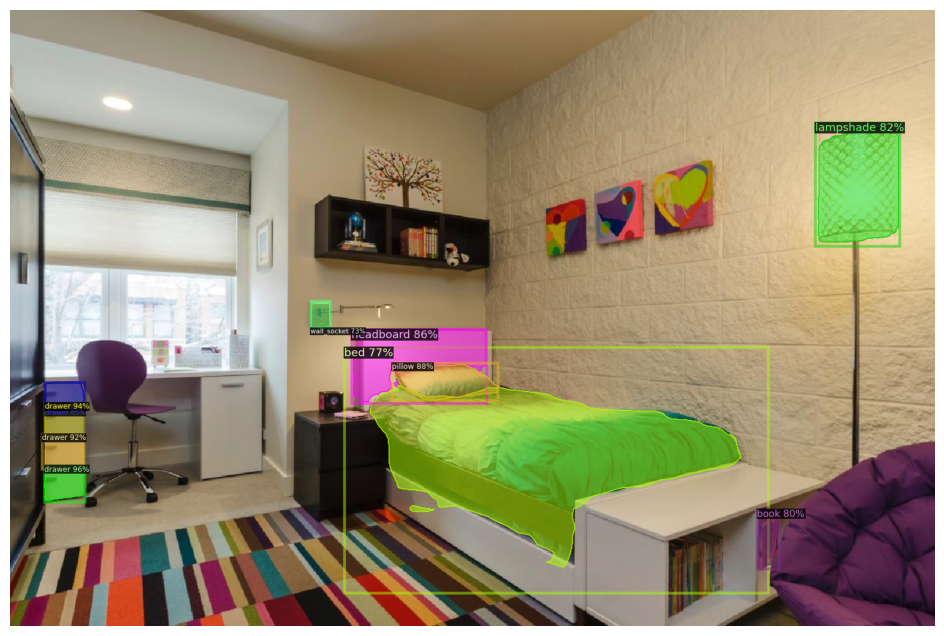

In [14]:
detector2 = Detector(model_type="LVIS") 
detector2.detect_image("habitacion.jpg")

La Segmentación Panóptica (Panoptic Segmentation) es una tarea en visión por computadora que combina dos tipos de segmentación: Segmentación Semántica (Asigna una categoría a cada píxel de una imagen) y la Segmentación de Instancias (Identifica y separa objetos individuales de la misma clase.)

Se puede eliminar uno de los tipos de segmentación y representar el otro. Lase diferencias son:


- Eliminar la segmentación semántica
    - Se muestran solo los objetos individuales detectados (segmentación de instancias).
    - Se ignoran las áreas generales como el cielo, la carretera o el suelo.
- Eliminar la segmentación de instancias
    - Se muestra solo la segmentación semántica, agrupando píxeles por categorías sin distinguir instancias individuales.
    - Ejemplo: en una imagen con varios coches, todos se verían como una sola región de "coche", sin diferenciar cada uno.


Eliminando segmentación semántica:


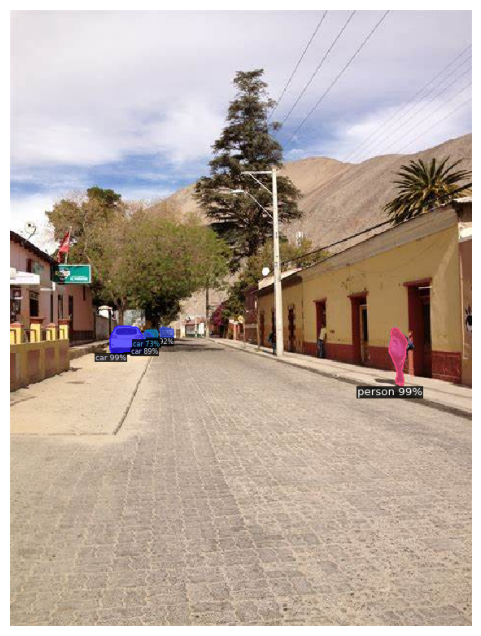

Eliminando segmentación de instancias:


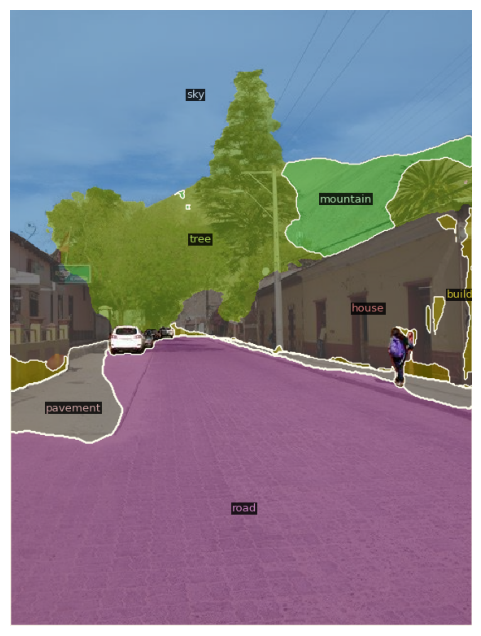

In [15]:
class Detector:
    def __init__(self, model_type="PS"):  # Para definir el constructor de la clase
        self.cfg = get_cfg()  # Para obtener la configuración del modelo

        # Cargamos la configuración del modelo y preentrenar el modelo
        if model_type == "PS":  # "Panoptic Segmentation"
            self.cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
            self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
        
        self.cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # Para definir el umbral de confianza
        self.cfg.MODEL.DEVICE = "cpu"  # Para definir el dispositivo
        self.predictor = DefaultPredictor(self.cfg)  # Para definir el predictor

    # Definir la ruta base para las imágenes
        self.base_image_path = "C:/Users/Marina/Practicas/Detectron2_pruebas/imagenes_probando_modelos/"

    # Para imágenes
    def detect_image(self, image_name, remove_semantic=False, remove_instance=False):  # Metemos el nombre de la imagen
        image_path = self.base_image_path + image_name  # Concatenar la ruta base con el nombre de la imagen
        image = cv2.imread(image_path)   # Para leer la imagen

        # Obtener las predicciones y la información de segmentación panóptica
        predictions, segmentInfo = self.predictor(image)["panoptic_seg"]
        # Verificar si self.cfg.DATASETS.TRAIN no está vacío
        if len(self.cfg.DATASETS.TRAIN) > 0:
            dataset_name = self.cfg.DATASETS.TRAIN[0]
        else:
            dataset_name = "coco_2017_train"  # Usar un nombre de dataset por defecto

        # Visualizar las predicciones de segmentación panóptica
        viz = Visualizer(image[:, :, ::-1], MetadataCatalog.get(dataset_name), scale=1.2)

        if remove_semantic:
            # Eliminar la segmentación semántica
            segmentInfo = [s for s in segmentInfo if s["isthing"]]
        elif remove_instance:
            # Eliminar la segmentación de instancias
            segmentInfo = [s for s in segmentInfo if not s["isthing"]]

        out_image = viz.draw_panoptic_seg_predictions(predictions.to("cpu"), segmentInfo).get_image()[:, :, ::-1]

        # Convertir la imagen de BGR a RGB
        out_image_rgb = cv2.cvtColor(out_image, cv2.COLOR_BGR2RGB)

        # Mostrar la imagen con las instancias detectadas utilizando matplotlib
        plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura
        plt.imshow(out_image_rgb)
        plt.axis('off')  # Ocultar los ejes
        plt.show()

# Crear una instancia del detector Panoptic Segmentation
detector2 = Detector(model_type="PS")

# Detectar instancias en una imagen y eliminar la segmentación semántica
print("Eliminando segmentación semántica:")
detector2.detect_image("carretera.jpg", remove_semantic=True)

# Detectar instancias en una imagen y eliminar la segmentación de instancias
print("Eliminando segmentación de instancias:")
detector2.detect_image("carretera.jpg", remove_instance=True)